<a href="https://colab.research.google.com/github/NinaKozma/PPPO_Projekat/blob/main/PPPO_Projekat2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uvod**

**Student: Nina Kozma IT4-20117 <br>
Predmet: Principi prezentacije i prepoznavanja oblika <br>
Tema projektnog zadatka: Detekcija godina i pola <br>
Datum: Jul 2021. godine**

  Duboko učenje pronašlo je ogromnu primernu na polju računarske vizije. Jedna od najvažnijih primena računarske vizije je na polju detekcije i prepoznavanja lica u *security-based* aplikacijama.

U nastavku ću preći primenu dubokog učenja zasnovanog na licu, a koja se tiče predviđanja starosti i pola na osnovu slike lica.

Za potrebe projekta, izvršeno je pretprocesiranje čitavog dataseta iz sledećih razloga:


*   Sve slike su različitih veličina
*   Neke od slika su u potpunosti oštećene
*   Na pojedinim slikama se ne nalaze lica
*   Meta podaci su u .mat formatu, umesto u .csv formatu
*   Podaci nisu pravilno balansirani (npr. ima gotovo tri puta više slika lica osoba muškog nego ženskog pola)

Shodno tome, najpre sam izvršila filtriranje slika i sačuvala ih u odgovarajućem formatu. Pored toga, takođe sam izvršila konverziju .mat fajla sa meta podacima u .csv fajl.





# **Priprema podataka za detekciju godina i pola**

Dataset je postavljen na Google Drive i sada sledi učitavanje izvornog dataseta sa slikama - images.zip:

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=161WKy0O50mkgwC1oclAC_FrBzGhzuUTz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=161WKy0O50mkgwC1oclAC_FrBzGhzuUTz" -O images.zip && rm -rf /tmp/cookies.txt

--2021-07-07 09:07:27--  https://docs.google.com/uc?export=download&confirm=zrvh&id=161WKy0O50mkgwC1oclAC_FrBzGhzuUTz
Resolving docs.google.com (docs.google.com)... 172.217.204.101, 172.217.204.138, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-00-docs.googleusercontent.com/docs/securesc/1ejv3vn2l5gh67ecvfef503d1sal86hc/md7mege2lfmd8f35f3dlquv6pf66d790/1625648775000/10681374450611948426/04782508086796074272Z/161WKy0O50mkgwC1oclAC_FrBzGhzuUTz?e=download [following]
--2021-07-07 09:07:27--  https://doc-0g-00-docs.googleusercontent.com/docs/securesc/1ejv3vn2l5gh67ecvfef503d1sal86hc/md7mege2lfmd8f35f3dlquv6pf66d790/1625648775000/10681374450611948426/04782508086796074272Z/161WKy0O50mkgwC1oclAC_FrBzGhzuUTz?e=download
Resolving doc-0g-00-docs.googleusercontent.com (doc-0g-00-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Conne

Unzip izvornog dataseta sa slikama - images.zip:

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_crop/91/7259691_1983-04-27_2012.jpg  
  inflating: wiki_crop/91/7287691_1979-08-29_2012.jpg  
  inflating: wiki_crop/91/7294591_1987-12-25_2011.jpg  
  inflating: wiki_crop/91/731591_1964-07-17_2008.jpg  
  inflating: wiki_crop/91/739691_1956-09-20_2011.jpg  
  inflating: wiki_crop/91/741791_1917-12-18_2004.jpg  
  inflating: wiki_crop/91/743391_1954-03-15_2015.jpg  
  inflating: wiki_crop/91/7464891_1984-09-30_2013.jpg  
  inflating: wiki_crop/91/7534191_1983-04-17_2010.jpg  
  inflating: wiki_crop/91/763791_1934-12-30_1990.jpg  
  inflating: wiki_crop/91/7671891_1987-03-02_2006.jpg  
  inflating: wiki_crop/91/7711491_1982-12-06_2014.jpg  
  inflating: wiki_crop/91/77491_1916-04-05_1948.jpg  
  inflating: wiki_crop/91/779591_1953-03-01_2014.jpg  
  inflating: wiki_crop/91/7798491_1947-01-25_2013.jpg  
 extracting: wiki_crop/91/783791_1917-06-18_1967.jpg  
  inflating: wiki_crop/91/794891_1970-02-12_2011.jpg  
  infla

U nastavku sledi konverzija .mat fajla dataseta u .csv format, pri čemu se za svaku sliku iz dataseta navode sledeće informacije: izračunate godine starosti lica sa slike, procenjeni pol osobe sa slike i pun naziv slike.

In [ ]:
#Učitavanje .mat fajla sa meta podacima
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
         array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
         array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
         array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
         array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
         array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
       dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
         array(['Dettmar Cramer'], dtype='<U14'),
         array(['Marc Okrand'], dtype='<U11'), ...,
         array(['Michael Wiesinger'], dtype='<U17'),
         array(['Johann Grugger

In [ ]:
#Konverzija .mat fajla u .csv fajl 
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

wiki_mat = '/content/wiki_crop/wiki.mat'

wiki_data = loadmat(wiki_mat)

del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)

time data '829-09-08' does not match format '%Y-%m-%d'
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-00' does not match format '%Y-%m-%d'
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-02-00' does not match format '%Y-%m-%d'


In [ ]:
data = pd.read_csv('meta.csv')
data.head()


,age,gender,path
0,32,female,wiki_crop/23/41926823_1979-03-22_2012.jpg
1,78,female,wiki_crop/87/2408087_1908-06-18_1987.jpg
2,69,male,wiki_crop/34/1711634_1941-08-31_2011.jpg
3,24,male,wiki_crop/54/38384954_1989-10-05_2014.jpg
4,21,male,wiki_crop/54/46348054_1920-08-10_1942.jpg


In [ ]:
data.columns

Index(['age', 'gender', 'path'], dtype='object')

In [ ]:
data.shape

(40216, 3)

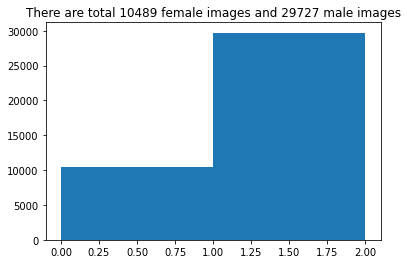

In [ ]:
#Prikaz (ne)balansiranosti dataseta
import matplotlib.pyplot as plt

gender = []
for g in data['gender'].values:
    if g == 'male':
        gender.append(1)
    else:
        gender.append(0)
            

plt.hist(gender, range(3))
plt.title('There are total ' + str(len(gender) - sum(gender)) + ' female images and ' + str(sum(gender)) + ' male images')
plt.show()

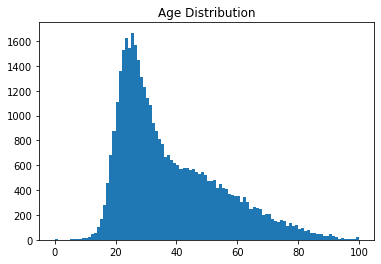

In [ ]:
plt.hist(data['age'], range(101))
plt.title('Age Distribution')
plt.show()

Procesiranje slika za potrebe detekcije godina:

In [ ]:
# Import neophodnih modula
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Učitavanje dataseta
meta = pd.read_csv('meta.csv')

# Brisanje kolone sa polom
meta = meta.drop(['gender'], axis=1)

# Filtriranje dataseta
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

# Konverzija vrednosti podataka u numpy array
meta = meta.values

# Podela dataseta na trening i testni skup
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

# Kreiranje svih neophodnih direktorijuma
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Kreiranje trening i testnog seta
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

Streaming output truncated to the last 5000 lines.
--(3033)Processing--
--(3034)Processing--
--(3035)Processing--
--(3036)Processing--
--(3037)Processing--
--(3038)Processing--
--(3039)Processing--
--(3040)Processing--
--(3041)Processing--
--(3042)Processing--
--(3043)Processing--
--(3044)Processing--
--(3045)Processing--
--(3046)Processing--
--(3047)Processing--
--(3048)Processing--
--(3049)Processing--
--(3050)Processing--
--(3051)Processing--
--(3052)Processing--
--(3053)Processing--
--(3054)Processing--
--(3055)Processing--
--(3056)Processing--
--(3057)Processing--
--(3058)Processing--
--(3059)Processing--
--(3060)Processing--
--(3061)Processing--
--(3062)Processing--
--(3063)Processing--
--(3064)Processing--
--(3065)Processing--
--(3066)Processing--
--(3067)Processing--
--(3068)Processing--
--(3069)Processing--
--(3070)Processing--
--(3071)Processing--
--(3072)Processing--
--(3073)Processing--
--(3074)Processing--
--(3075)Processing--
--(3076)Processing--
--(3077)Processing--
--(3

Procesiranje slika za potrebe detekcije pola:

In [ ]:
# Import neophodnih modula
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Učitavanje podataka
meta = pd.read_csv('meta.csv')

# Brisanje kolone o godinama, s obzirom da mi više ne treba
meta = meta.drop(['age'], axis=1)

# Podela dataseta u trening i testni skup
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

# Dataset sadrži više slika lica osoba muškog pola nego ženskog --- ovo može da dovede do problema...
# Kako bi se rešio ovaj problem, selektuje se isti broj muških i ženskih lica u trening skupu
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

# Shuffling dataseta
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

# Kreiranje direktorijuma
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

# Ubacivanje slika u trening i test skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

Streaming output truncated to the last 5000 lines.
--(16342)Processing--
--(16343)Processing--
--(16344)Processing--
--(16345)Processing--
--(16346)Processing--
--(16347)Processing--
--(16348)Processing--
--(16349)Processing--
--(16350)Processing--
--(16351)Processing--
--(16352)Processing--
--(16353)Processing--
--(16354)Processing--
--(16355)Processing--
--(16356)Processing--
--(16357)Processing--
--(16358)Processing--
--(16359)Processing--
--(16360)Processing--
--(16361)Processing--
--(16362)Processing--
--(16363)Processing--
--(16364)Processing--
--(16365)Processing--
--(16366)Processing--
--(16367)Processing--
--(16368)Processing--
--(16369)Processing--
--(16370)Processing--
--(16371)Processing--
--(16372)Processing--
--(16373)Processing--
--(16374)Processing--
--(16375)Processing--
--(16376)Processing--
--(16377)Processing--
--(16378)Processing--
--(16379)Processing--
--(16380)Processing--
--(16381)Processing--
--(16382)Processing--
--(16383)Processing--
--(16384)Processing--
--(

# **Model za detekciju pola**


Keras je biblioteka za duboko učenje visokog nivoa koja za izračunavanje koristi biblioteke nižeg nivoa kao što je TensorFlow. Visok nivo podrazumeva da Keras pruža funkcionalnosti koje podržavaju stvaranje modela sa fokusom na ideji, a ne na konkretnoj implementaciji.


In [ ]:
!pip install keras_applications

     |████████████████████████████████| 51kB 2.8MB/s 


**This project is using the MobileNetV2 deep learning CNN architecture to predict it. **

In [ ]:
##################################
# STEP - 1: Import dependencija
##################################

# Import dependencija
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#####################
# STEP - 2: Model
#####################

# Modelovanje arhitekture modela u Kerasu se zasniva na sekvenci slojeva modela!
# Prvi tip modela --> 
# Kreiranje sekvencijalnog modela, koji se definiše kao linearni niz slojeva
model = Sequential()

# Drugi tip modela --> 
# Za ovaj model koristim MobileNetV2
# Koriste se imagenet težine
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

# Dodavanje mobile model i konfigurisanje output sloja
# Dense - kompletno povezani sloj neuronske mreže, sa 2 neurona u sloju, pri čemu je tip funkcije aktivacije softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

# Kompajliranje modela - konfigurisanje modela za trening, uz navođenje optimizatora
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

# Prikaz podataka o modelu...
print(model.summary())

############################
# STEP 3: Data Preprocessing
############################

# Ovde se korsti ImageDataGenerator klasa za data augmentaciju
# Omogućava augmentaciju DOK se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Čitanje trening skupa
# Batch size - dimenzija podskupa treniranja
# Class_mode = categorical - 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
# Čitanje testnog skupa
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

############################
# STEP 4: Treniranje modela
############################

# Za bolje rezultate prilagodi epohe....
history1 = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)

##########################
# STEP 5: Čuvanje modela
##########################

# Saving the model
model.save('weights/gender_mobile.h5')

9420800/9406464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________
None
Found 18902 images belonging to 2 classes.
Found 21314 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 463s 4s/step - loss: 1.2387 - accuracy: 0.6578 - val_loss: 1.0181 - val_accuracy: 0.8169
Epoch 2/10
100/100 [==============================] - 438s 4s/step - loss: 0.6606 - accuracy: 0.7660 - val_loss: 0.9863 - val_accuracy: 0.7547
Epoch 3/10
100/100 [==============================] - 441s 4s/step - loss: 0.5518 - accuracy: 0.8118 - val_loss: 0.8608 - val_accuracy: 0.7312
Epoch 4/10
100/100 [==============================] - 443s 4s/step - loss: 0.5296 - accuracy: 0.8151 - val_loss: 0.9424 - val_accuracy: 0.6809
Epoch 5/10
100/100 [==============================] - 425s 4s/step - loss: 0.4804 - accuracy: 0.8267 - val_loss: 0.9108 - val_accuracy: 0.6716
Epoch 6/10
100/100 [==============================] - 432s 4s/step - loss: 0.4673 - accuracy: 0.8347 - val_loss: 0.8690 - val_accuracy: 0.6934
Epoch 7/10
100/100 [==============================] - 436s 4s/step - loss: 0.4408 - accuracy: 0.8408 - val_loss: 0.9286 - val_accuracy: 0.6628

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


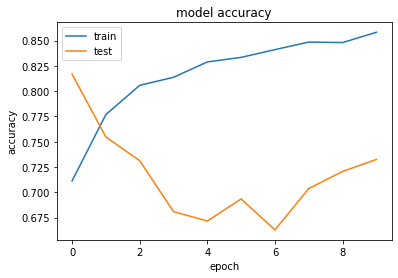

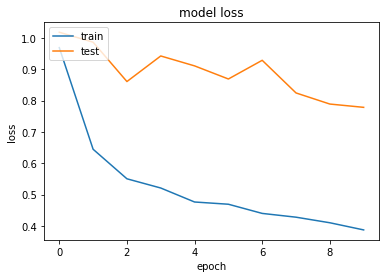

In [ ]:
import matplotlib.pyplot as plt
##########################
# STEP 6: Analiza performansi modela
##########################

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

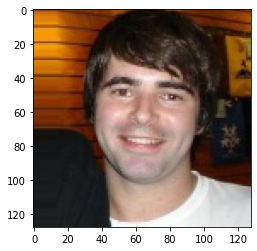

Male


In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/train/27/12879.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]>gender_pred[0][1]:
  print('Female')
else:
  print('Male')

# **Model za detekciju godina**

In [11]:
##################################
# STEP - 1: Import dependencija
##################################

# Import dependencija
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#####################
# STEP - 2: Model
#####################

# Modelovanje arhitekture modela u Kerasu se zasniva na sekvenci slojeva modela!
# Prvi tip modela --> 
# Kreiranje sekvencijalnog modela, koji se definiše kao linearni niz slojeva
model2 = Sequential()

# Drugi tip modela -->
# Za ovaj model koristim InceptionResNetV2
# Koriste se imagenet težine
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

# Dodavanje mobile modela i konfigurisanje output sloja
# Dense - kompletno povezani sloj neuronske mreže, sa 102 neurona, pri čemu je tip funkcije aktivacije softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

# Kompajliranje modela - konfigurisanje modela za trening, uz navođenje optimizatora
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

# Prikaz podataka o modelu
print(model2.summary())

############################
# STEP 3: Data Preprocessing
############################

# Koristi se ImageDataGenerator za data augmentaciju 
# Omogućava augmentaciju DOK se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Čitanje trening skupa
train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
# Čitanje testnog skupa
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

############################
# STEP 4: Treniranje modela
############################

# Za bolje perfomanse prilagodi epohe...
history2 = model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)

##########################
# STEP 5: Čuvanje modela
##########################

# Saving the model
model2.save('weights/age_inception.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 102)               130662    
Total params: 2,388,646
Trainable params: 2,354,534
Non-trainable params: 34,112
_________________________________________________________________
None
Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 503s 4s/step - loss: 9.2482 - accuracy: 0.0086 - val_loss: 7.3432 - val_accuracy: 0.0150
Epoch 2/10
100/100 [==============================] - 423s 4s/step - loss: 6.9975 - accuracy: 0.0220 - val_loss: 6.7426 - val_accuracy: 0.0231
Epoch 3/10
100/100 [==============================] - 423s 4s/step - loss: 6.4073 - accuracy: 0.0317 - val_loss: 6.4209 - val_accuracy: 0.0225
Epoch 4/10
100/100 [==============================] - 422s 4s/step - loss: 5.9922 - accuracy: 0.0265 - val_loss: 6.2478 - val_accuracy: 0.0250
Epoch 5/10
100/100 [==============================] - 424s 4s/step - loss: 5.7131 - accuracy: 0.0320 - val_loss: 6.2118 - val_accuracy: 0.0213
Epoch 6/10
100/100 [==============================] - 418s 4s/step - loss: 5.5454 - accuracy: 0.0312 - val_loss: 6.0392 - val_accuracy: 0.0200
Epoch 7/10
100/100 [==============================] - 426s 4s/step - loss: 5.2559 - accuracy: 0.0412 - val_loss: 6.0161 - val_accuracy: 0.0256

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


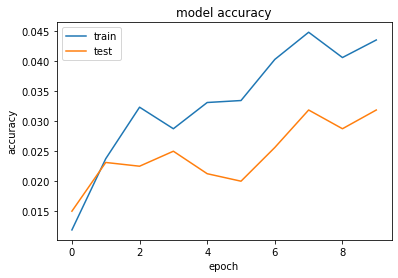

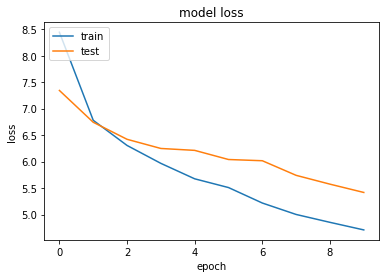

In [12]:
import matplotlib.pyplot as plt
##########################
# STEP 6: Analiza performansi modela
##########################

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

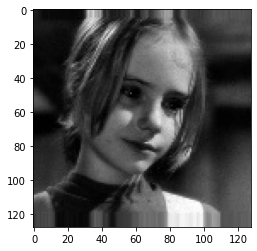

In [22]:

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/10/5024.jpg'  
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

if temp==0:
  print('0-24 yrs old')
if temp==1:
  print('25-49 yrs old')
if temp==2:
  print('50-74 yrs old')
if temp==3:
  print('75-99 yrs old')
if temp==4:
  print('91-124 yrs old')